<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 1 - Data Visualization
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Visualization
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install squarify
import squarify 

In [2]:
data_df= pd.read_csv('../data/Processed.csv', index_col=False)
data_df.sample(n=5)

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method
269,23,Non-binary,Senior,Computer Science,1379,500,3665,946,114,143,211,92,20,83,113,110,Mobile Payment App
555,18,Male,Senior,Engineering,1245,80,3063,836,397,136,89,110,29,155,59,186,Mobile Payment App
101,23,Female,Senior,Psychology,1115,437,5317,818,341,136,116,115,22,56,38,106,Mobile Payment App
922,18,Male,Senior,Computer Science,1280,550,4843,500,112,99,119,67,70,141,97,109,Credit/Debit Card
189,22,Non-binary,Sophomore,Psychology,954,337,5756,717,159,195,196,138,26,154,160,85,Credit/Debit Card


In [3]:
n_rows=data_df.shape[0]
n_cols=data_df.shape[1]
n_rows, n_cols

(1000, 17)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Year In School            1000 non-null   object
 3   Major                     1000 non-null   object
 4   Monthly Income            1000 non-null   int64 
 5   Financial Aid             1000 non-null   int64 
 6   Tuition                   1000 non-null   int64 
 7   Housing                   1000 non-null   int64 
 8   Food                      1000 non-null   int64 
 9   Transportation            1000 non-null   int64 
 10  Books & Supplies          1000 non-null   int64 
 11  Entertainment             1000 non-null   int64 
 12  Personal Care             1000 non-null   int64 
 13  Technology                1000 non-null   int64 
 14  Health & Wellness        

## Câu hỏi: Thành phần chi tiêu (trung bình) của sinh viên.

### 1. Mục đích

- Nhằm biết được nhu cầu về tài chính và mức độ chi tiêu của sinh viên trong các hạng mục:
    - Tiền nhà
    - Tiền ăn uống
    - Tiền đi lại
    - Tiền sách/tài liệu học tập
    - Tiền giải trí
    - Tiền chăm sóc bản thân
    - Tiền cho các đồ dùng công nghệ
    - Tiền cho sức khỏe
    - Các loại chi tiêu khác

### 2. Phân tích

In [5]:
# Prepare Necessary DataFrame
df = data_df.describe().agg('mean').iloc[4:].sort_values(ascending=True).to_frame().reset_index()
df.columns = ['class', 'counts']
df

,class,counts
0,Personal Care,173.324626
1,Entertainment,193.598056
2,Miscellaneous,213.509028
3,Health & Wellness,217.487693
4,Transportation,223.930624
5,Books & Supplies,265.270690
6,Technology,266.631055
7,Food,324.948951
8,Housing,668.590577


In [6]:
# Prepare Data For Plot
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(int(x[1])) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

### 3. Trực quan hóa

- Vì cần phải thể hiện thành phần trong biểu đồ (Composition) nên ta chọn bản đồ cây (Treemap) để trực quan hóa.
- Thay vì sử dụng biểu đồ hình tròn (Pie chart), ta sử dụng bản đồ cây vì nó dễ nhìn hơn khi có nhiều thành phần trong cùng một biểu đồ.

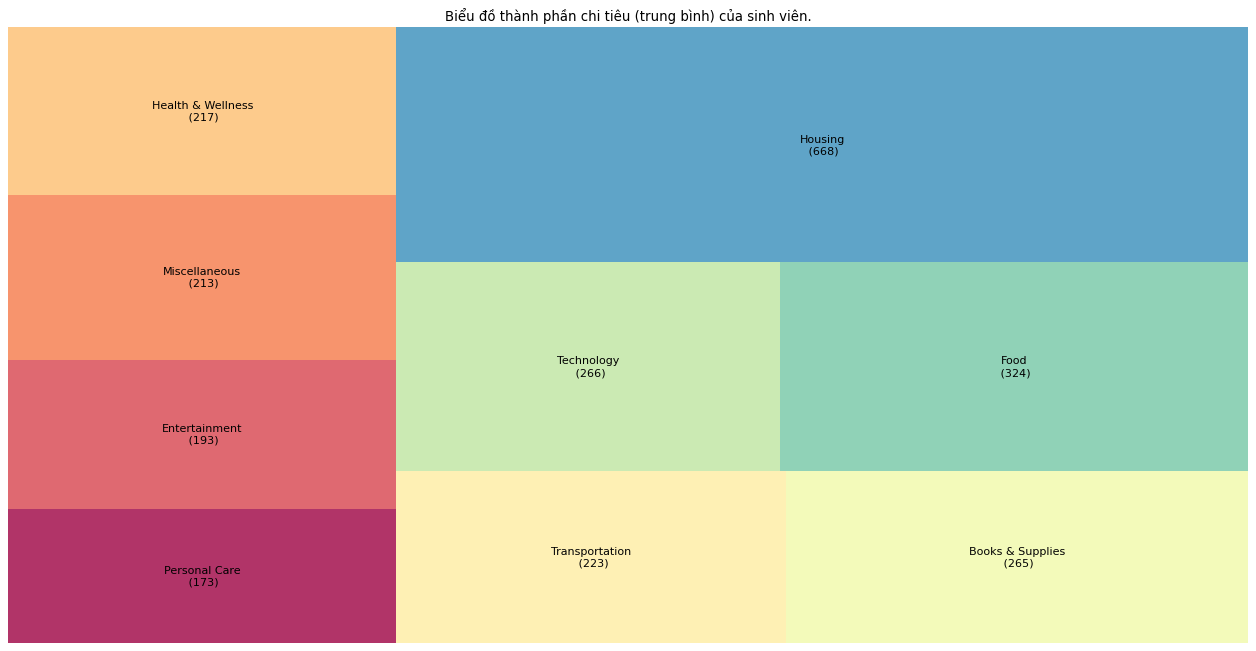

In [7]:
# Draw Plot
plt.figure(figsize=(20,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Biểu đồ thành phần chi tiêu (trung bình) của sinh viên.')
plt.axis('off')
plt.savefig("Visualize - Bảo.svg")

### 4. Kết luận

- Sinh viên cần chi tiêu cho tiền nhà với số tiền nhiều nhất.
- Sinh viên chi tiêu cho các đồ dùng công nghệ nhiều bất thường.
- Sinh viên có xu hướng ít chi tiêu cho chăm sóc bản thân.